# Linear Model: Least Squares

- yields **stable**, but possibly **inaccurate** predictions
- makes **huge assumptions about structure** of data

## Model

Given vector of inputs $X^T = (X_1,X_2,\dots,X_p)$, we predict the Output $Y$ via:

$$
\hat{Y}=\hat{\beta}_0+\sum\limits_{j=1}^{p}X_j\hat{\beta}_j
$$

- $\hat{\beta}_0$ intercept (or *bias*) term

In vector form (with constant variable 1 in X and $\hat{\beta}_0$ in vector $\hat{\beta}$):

$$
\hat{Y}=X^T\hat{\beta}
$$

- $\hat{Y}\in\mathbb{R}^K$, $\beta\in\mathbb{R}^{p\times K}$

## Fit

- Error function:

$$
\Epsilon(\beta)=\sum\limits_{i=1}^{N}(y_i-x_i^T\beta)^2
$$

- in Matrix notation:

$$
\Epsilon(\beta)=(\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta)
$$

- Differentiating w.r.t $\beta$:

$$
\frac{\delta\Epsilon(\beta)}{\delta\beta}=-2\mathbf{X^T}(\mathbf{y}-\mathbf{X}\beta)
$$

- **Unique Solution** (if $\mathbf{X}^T\mathbf{X}$ nonsingular):

$$
\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty
$$

- Fitted value at $i$th input $x_i$:

$$
\hat{y}_i=\hat{y}(x_i)=x_i^T\hat{\beta}
$$

# Linear (Least Squares) Classifier Example #1

Classifier on simple gaussian data with 2 classes

*Section 2.3  
Pages 12-14*

In [258]:
import matplotlib.pyplot as plt
import numpy as np

Training Data: Two 2-dimensional data classes with each a 100 points and means at (0, 0) and (1, 1) and the identity as the covariance matrix

In [259]:
mean1 = np.array([0, 0])
mean2 = np.array([2, 1])
cov = np.eye(2)
blue = np.random.multivariate_normal(mean1, cov, 100)
red = np.random.multivariate_normal(mean2, cov, 100)

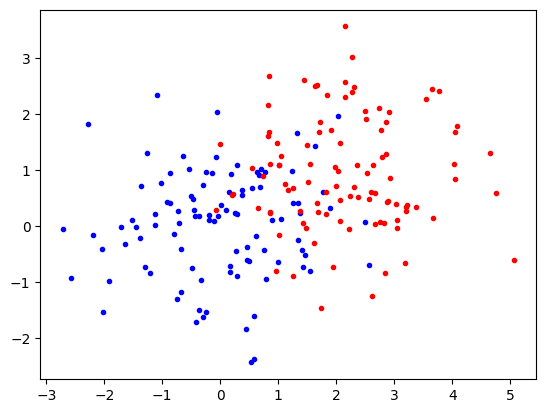

In [260]:
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.show()

Y coded 0 for BLUE and 1 for RED

In [261]:
# turn the data into a matrix
X = np.concatenate((blue, red), axis=0)
# include bias term
X = np.concatenate((np.ones((200, 1)), X), axis=1)
y = np.concatenate((np.zeros(100), np.ones(100)))

Fit $\hat{\beta}$
$$\hat{Y}=X^T\hat{\beta}$$
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$

In [262]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
Y_hat = X @ beta_hat

Fitted $\hat{y}_i$ for single data point i
$$\hat{y}_i=\hat{y}(x_i)=x_i^T\hat{\beta}$$

In [263]:
y_hat = lambda x_i: x_i.T @ beta_hat

Class Variable $\hat{G}$
$$\hat{G}=\begin{cases} \mathrm{\color{red}RED} & \quad \text{if } \hat{Y} > 0.5, \\ \mathrm{\color{blue}BLUE} & \quad \text{if } \hat{Y} \leq 0.5 \end{cases}$$

In [264]:
G_hat = np.array([1 if y_hat(x_i) > 0.5 else 0 for x_i in X])

Decision Boundary
$$x^T\hat{\beta}=0.5$$

In [265]:
boundary = lambda x_1, x_2: beta_hat[0] + beta_hat[1] * x_1 + beta_hat[2] * x_2 - 0.5

Plot Solution

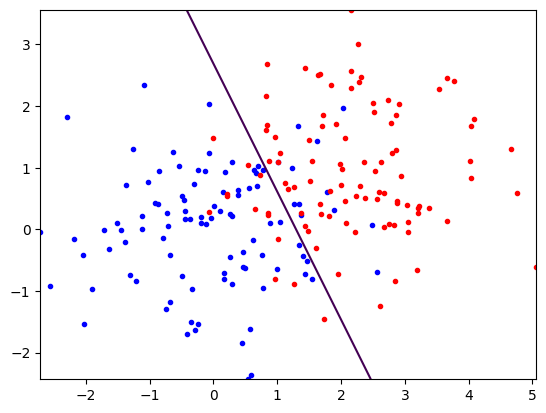

In [266]:
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(red[:, 0], red[:, 1], 'r.')

x_1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x_2 = np.linspace(np.min(X[:, 2]), np.max(X[:, 2]), 100)
X_1, X_2 = np.meshgrid(x_1, x_2)
plt.contour(X_1, X_2, boundary(X_1, X_2), [0])
plt.show()


This an optimal Solution for this case!

> If the training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means, we will see [...] that a linear decision boundary is the best one can do, and that our estimate is almost optimal. The region of overlap is inevitable, and future data to be predicted will be plagued by this overlap as well (p. 33)